In [1]:
import networkx as nx
from community import community_louvain as cm
import numpy as np
import scipy as sp
from numpy import linalg as la
import matplotlib.pyplot as plt

In [2]:
def robust_community(target,g):
    global freq_dict
    freq_dict={}
    max=100
    for node in list(g.nodes()):
        freq_dict[node]=0
    for i in range(0,max):
        # louvain partition
        partition = cm.best_partition(g)

        target_module=partition[target]

        for node in list(partition.keys()):
            if partition[node]==target_module:
                freq_dict[node]=freq_dict[node]+1
    freq_dict_filt = dict((k, v) for k, v in freq_dict.items() if v > 0)
    #Calculating size of module for each threshold
    lengths=[]
    for i in range(0,max):
        freq_dict_filt = dict((k, v) for k, v in freq_dict.items() if v > i)
        lengths.append(len(freq_dict_filt))
    plt.plot(lengths)
    plt.title('Frequency plot for nodes in {} community (100 trials)'.format(target))
    plt.xlabel('Number of times appearing in {} community'.format(target))
    plt.ylabel('Number of nodes')
    plt.savefig("robust/{}.png".format(target))
    summary = ["Node,Frequency"]
    for node in g:
        summary.append("{},{}".format(node, freq_dict[node]))
    #write summary to file
    with open("robust2/{}.csv".format(target), "w") as file:
        file.write("\n".join(summary))

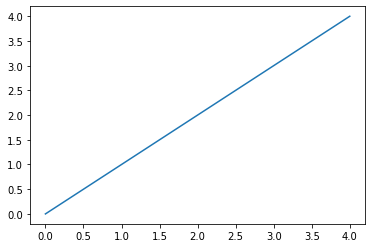

In [24]:
plt.plot(range(5))
plt.savefig("test.png")

In [3]:
# read yeast protein interaction file
g = nx.read_weighted_edgelist("4932.protein.links.v11.5.txt",comments="#",nodetype=str)

In [4]:
# thresholding
threshold_score = 750
for edge in g.edges: 
    weight = list(g.get_edge_data(edge[0],edge[1]).values())
    if(weight[0] <= threshold_score):
        g.remove_edge(edge[0],edge[1])

In [5]:
#remove essential nodes
file = open("essential_nodes.txt")
for line in file.readlines():
    node = line.strip()
    if node in g:
        g.remove_node(node)
file.close()

In [6]:
#select largest component
components = sorted(nx.connected_components(g), key=len, reverse=True)
g = g.subgraph(components[0])
print(g)

Graph with 4396 nodes and 44311 edges


In [29]:
# add new interactions
file = open("new_interactions.txt")
g1=nx.Graph(g)
new_interactions=[]
for line in file.readlines():
    node = line.strip()
    if node in g1:
        g1.add_edge('4932.YJR104C', node)
        new_interactions.append(node)
file.close()
print(new_interactions)

['4932.YDL106C', '4932.YDR451C', '4932.YML027W', '4932.YNL055C', '4932.YIL114C', '4932.YNL073W', '4932.YOR065W', '4932.YPL106C', '4932.YBR169C', '4932.YDR411C', '4932.YER177W', '4932.YDR099W', '4932.YNR051C', '4932.YNL121C', '4932.YHR117W', '4932.YIL016W', '4932.YAL005C', '4932.YLL024C', '4932.YBL075C', '4932.YER103W', '4932.YLR113W', '4932.YPR054W', '4932.YKR054C', '4932.YDR424C', '4932.YMR299C', '4932.YDR488C', '4932.YML124C', '4932.YPL116W', '4932.YIL095W']


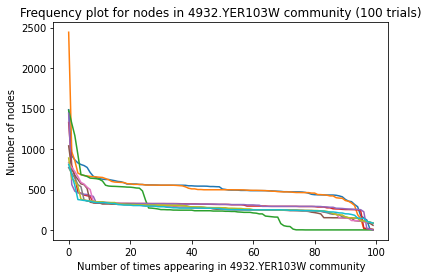

In [31]:
#run robust community function on relevant nodes in the 'mutantinteractions' list. 
file = open("sim.txt")
for line in file.readlines():
    node = line.strip()
    robust_community(node, g1)
file.close()

In [85]:
#Fine tune choice of threshold by inspecting above plot
#remove essential nodes
name = "4932.YLR113W"
file = open("robust/{}.csv".format(name))
header = True
d = {}
for line in file.readlines():
    line = line.strip().split(',')
    if header == True:
        header = False
        continue
    d[line[0]] = line[1]
file.close()
threshold=70#choose different thresholds to test when the number of nodes drops to a stable number
freq_dict_filtered = dict((k, v) for k, v in d.items() if int(v) > threshold)
print('Number of nodes =',len(freq_dict_filtered))
N = len(freq_dict_filtered)
#Run the below to get the robust community once a good threshold has been chosen
# print('Robust community =',freq_dict_filtered.keys())

Number of nodes = 53


In [ ]:
freq_dict_filtered

In [86]:
with open("{}.txt".format(name), "w") as file:
        intro = ["Node : {}".format(name), "Threshold: {}".format(threshold), "No. of nodes: {}".format(N)]
        file.write("\n".join(intro))
        file.write("\n".join(freq_dict_filtered.keys()))

In [11]:
print(freq_dict_filtered)

{'4932.YBR017C': '100', '4932.YOR027W': '100', '4932.YCR060W': '100', '4932.YNL328C': '100', '4932.YBR101C': '100', '4932.YDR320C': '100', '4932.YFL016C': '100', '4932.YLR077W': '100', '4932.YOR185C': '100', '4932.YBL075C': '100', '4932.YMR186W': '100', '4932.YAL005C': '100', '4932.YPL148C': '100', '4932.YLL024C': '100', '4932.YPR061C': '100', '4932.YKR095W': '100', '4932.YIL149C': '100', '4932.YJR032W': '100', '4932.YGR123C': '100', '4932.YER103W': '100', '4932.YJR147W': '100', '4932.YJR097W': '100', '4932.YGR249W': '100', '4932.YNL281W': '100', '4932.YLR090W': '100', '4932.YNL064C': '100', '4932.YDR159W': '100', '4932.YKL117W': '100', '4932.YDR214W': '100', '4932.YDL229W': '100', '4932.YPL106C': '100', '4932.YJR074W': '100', '4932.YOR298C-A': '100', '4932.YHR064C': '100', '4932.YGR285C': '100', '4932.YEL030W': '100', '4932.YLR369W': '100', '4932.YOL111C': '100', '4932.YKR082W': '100', '4932.YKL068W': '100', '4932.YBR137W': '100', '4932.YOR007C': '100', '4932.YDR192C': '100', '4932.YM